In [1]:
# definindo bibliotecas
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
# manipulação de dados 
#import pandas as pd
# manipulação de arrays
import numpy as np
# algoritmos de machine learning
#import sklearn
from sklearn.model_selection import KFold
# manipulação de imagens
from PIL import Image
# eventos do sistema operacional
import os
# expressões regulares
import re
# insere aleatoriedade
import random

%matplotlib inline

In [2]:
# https://pillow.readthedocs.io/en/stable/handbook/tutorial.html

In [3]:
# pega todas as imagens de um diretório e retorna em uma lista e um dicionario
def getAllImages(diretorio, padrao):
    pattern = re.compile(padrao)
    files = os.listdir(diretorio)
    list_img = []
    list_imgArray = []
    k = 0
    myDict = {}
    
    for entries in files:
        if(re.search(pattern, entries)):
            file = diretorio + str(entries)
            img = Image.open(file).convert('L')
            list_img.insert(k, img)
            k = k + 1
    k = 0        
    list_imgArray = imageToArrays(list_img)        
    for entries in files:
        if(re.search(pattern,entries)):  
            myDict[entries] = list_imgArray[k]
            k = k + 1
    return list_img, myDict

# converte imagem para vetor 1-D
def imageToArrays(img, nrow = 100, ncol = 100):
    img_array = [];
    
    for indice in range(0, len(img)):
        temp = (np.array(img[indice]).reshape(nrow*ncol)).astype(np.double)
        img_array.insert(indice, temp)
        
    return img_array

# converte imagem para dicionario 
def imageToDict(img_dict, nrow = 100, ncol = 100):
    imageDictValue = {};
    
    for chave in img_dict:
        valor_dict =  img_dict[chave]
        temp = (np.array(valor_dict).reshape(nrow*ncol)).astype(np.double)
        imageDictValue[chave] = temp
        
    return imageDictValue


# converte vetor 1-D para imagem 
def arraysToImage(array, nrow = 100, ncol = 100):
    images = [];
    
    for indice in range(0, len(array)):
        temp = array[indice].reshape(nrow, ncol).astype(np.uint8)
        images.insert(indice, Image.fromarray(temp))
        
    return(images)

# converte dicionario para imagem 
def dictToImage(imgDict, nrow = 100, ncol = 100):
    imageDict = {};
    
    for chave in imgDict:
        valor = imgDict[chave]
        temp = valor.reshape(nrow, ncol).astype(np.uint8)
        imageDict[chave] = Image.fromarray(temp)
        
    return imageDict

# coloca os valores na mesma escala [0,1]
def normalizacao(x):
    Max = max(x)
    Min = min(x)
    norm = (x - Min)/(Max - Min)
    return norm

# diferença da norma - quanto mais próximo de 0 melhor
def diff_norm(imgA, imgB):
    normA = normalizacao(imgA)
    normB = normalizacao(imgB)
    diff = abs(normA - normB)
    norm = sum(diff)
    return norm

# cross-Validation 
def crossValidationKFOLD(entrada, k = 2, seed = 100):
    size = len(entrada)
    subset_size = round(size / k)
    # serve para evitar enviesamento
    random.Random(seed).shuffle(entrada)
    
    # arredondamento para cima
    size = round(size + 0.5)
    
    subsets = [entrada[x:x+size] for x in range(0, len(entrada), subset_size)]
    
    kfolds = []
    for i in range(k):
        test = subsets[i]
        train = []
        for subset in subsets:
            if subset != test:
                train.append(subset)
        kfolds.append((train, test))
    
    return kfolds

def classificaSimDireta(indiceTeste,conjuntoTreino):
    diferencaAntiga = 9999999
    indImgMaisParecida = 0
    for indTreino in conjuntoTreino:
        diferencaNova = diff_norm(imgLikeVector[indTreino],imgLikeVector[indiceTeste])
        if diferencaNova < diferencaAntiga:
            diferencaAntiga = diferencaNova
            indImgMaisParecida = indTreino
    return diferencaAntiga, indImgMaisParecida

In [4]:
diretorio = "./Dados/very-easy/"
padrao = ".*\.jpg"

# images = vetor unico com imagens em formato de image
# imgLikeVector = vetor unico com imagens em formato de array
# images_dict = dicionario contendo classificacao de imagem e seu array
images, images_dict = getAllImages(diretorio, padrao)
imgLikeVector = imageToArrays(images)
print(imgLikeVector)
print()
print(images)
print()
print(images_dict)

[array([190., 188., 191., ...,  21.,  30.,  26.]), array([188., 179., 139., ...,  35.,  34.,  42.]), array([179., 178., 176., ...,  43.,  41.,  39.]), array([179., 180., 181., ...,  47.,  42.,  38.]), array([171., 173., 173., ..., 127., 130., 131.]), array([171., 174., 175., ..., 129., 132., 132.]), array([107., 117., 104., ..., 125., 124., 125.]), array([ 97.,  70.,  57., ..., 121., 122., 123.]), array([199., 197., 200., ...,  17.,  22.,  19.]), array([201., 202., 202., ...,  22.,  18.,  21.])]

[<PIL.Image.Image image mode=L size=100x100 at 0x7FFA87EC0080>, <PIL.Image.Image image mode=L size=100x100 at 0x7FFA87E09588>, <PIL.Image.Image image mode=L size=100x100 at 0x7FFA87EC02E8>, <PIL.Image.Image image mode=L size=100x100 at 0x7FFA87E09D68>, <PIL.Image.Image image mode=L size=100x100 at 0x7FFA87EC02B0>, <PIL.Image.Image image mode=L size=100x100 at 0x7FFA87E137F0>, <PIL.Image.Image image mode=L size=100x100 at 0x7FFA87EC0208>, <PIL.Image.Image image mode=L size=100x100 at 0x7FFA87E1

Train Index:  [0 1 2 3 5 7 8 9]
Test Index:  [4 6] 

conjunto  1
325.22866371982616


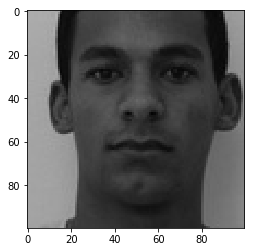

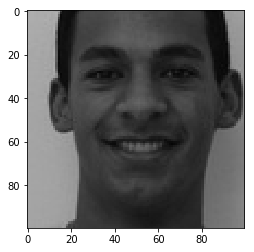

conjunto  2
705.0285714285708


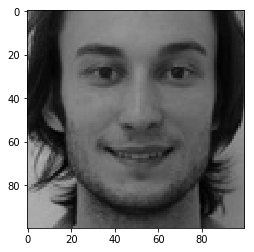

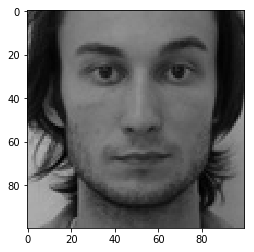

Train Index:  [0 1 3 4 5 6 8 9]
Test Index:  [2 7] 

conjunto  3
537.7917582072699


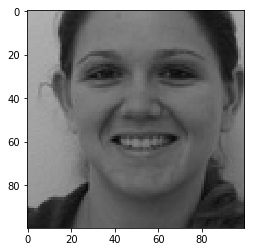

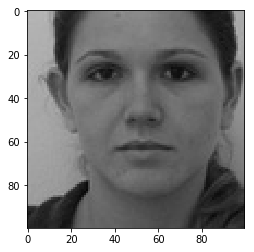

conjunto  4
705.0285714285708


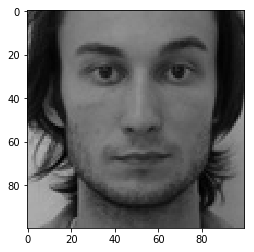

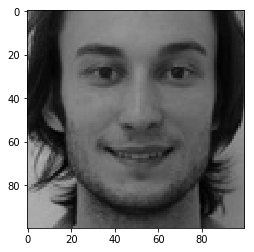

Train Index:  [0 1 2 3 4 6 7 8]
Test Index:  [5 9] 

conjunto  5
325.22866371982616


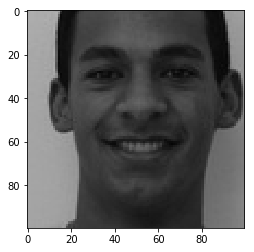

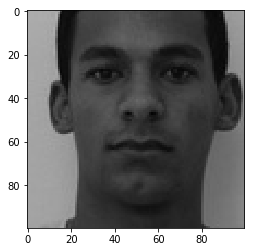

conjunto  6
498.94272277227657


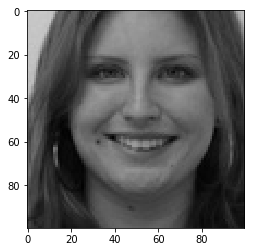

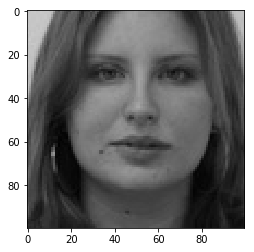

Train Index:  [0 2 4 5 6 7 8 9]
Test Index:  [1 3] 

conjunto  7
459.3768927666762


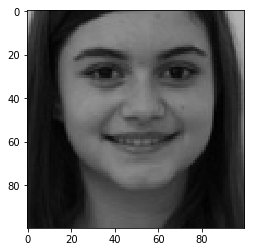

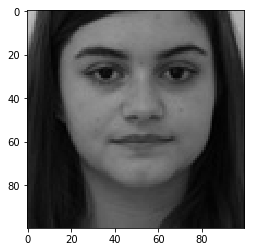

conjunto  8
537.7917582072699


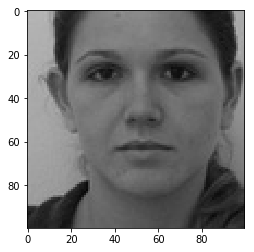

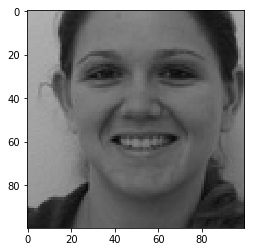

Train Index:  [1 2 3 4 5 6 7 9]
Test Index:  [0 8] 

conjunto  9
459.3768927666762


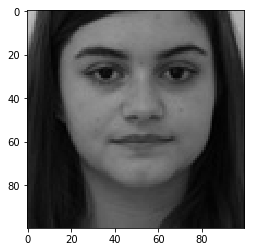

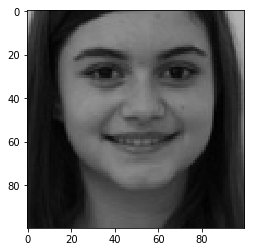

conjunto  10
498.94272277227657


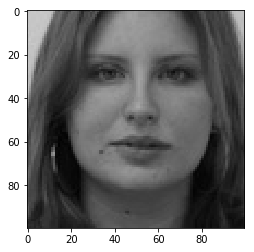

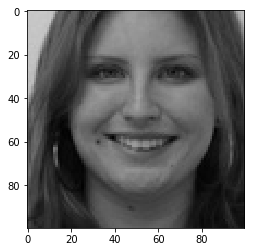

In [7]:
#Retorna em formato de indices do array os conjuntos
kf = KFold(5, random_state = 75, shuffle = True)
k = 1
for train_index, test_index in kf.split(imgLikeVector):
    print("Train Index: ", train_index)
    print("Test Index: ", test_index, "\n")
    for indexTeste in test_index:
        print("conjunto ", k)  
        plt.figure()  
        plt.imshow(images[indexTeste])
        diferencaAntiga, indImgMaisParecida = classificaSimDireta(indexTeste,train_index)
        plt.figure()
        plt.imshow(images[indImgMaisParecida])
        print(diferencaAntiga)
        k = k + 1
        plt.pause(0.1)
    

In [6]:
for train_index, test_index in kf.split(imgLikeVector):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

Train Index:  [0 1 2 3 5 7 8 9] 

Test Index:  [4 6]
Train Index:  [0 1 3 4 5 6 8 9] 

Test Index:  [2 7]
Train Index:  [0 1 2 3 4 6 7 8] 

Test Index:  [5 9]
Train Index:  [0 2 4 5 6 7 8 9] 

Test Index:  [1 3]
Train Index:  [1 2 3 4 5 6 7 9] 

Test Index:  [0 8]
